# PREPROCESSING DATA

In [ ]:
import pandas as pd
#read data train
data_asli=pd.read_csv('data_gojek_campur.csv')
#data_asli=data_asli.reset_index(drop=True)
#data_asli.to_csv('dataset_6000an_stemmed.csv',encoding='utf-8')
del data_asli['Unnamed: 0']
print len(data_asli)
data_asli.head(30)

In [ ]:
# remove the duplicate tweet
data_asli=data_asli[~data_asli['text'].duplicated()]
data_asli=data_asli.reset_index(drop=True)
print len(data_asli)
print data_asli.text[0]
data_asli.head()

In [ ]:
#we choose 30 data as data traing and remain as test 
#data_train=data_asli[0:800]
#data_test=data_asli[200:]
data_train=data_asli

In [ ]:
# convert data to lowercase
import string
for i in range(len(data_train)):
    text = string.lower(data_train['text'].iloc[i])
    data_train['text'].iloc[i]=text
print data_train['text'][0]
data_train.head()

In [ ]:
#remove number
import re
pattern=r'[0-9]+'
for i in range(len(data_train)):
    data_train['text'].iloc[i] = re.sub(pattern,'', data_train['text'].iloc[i], flags=re.MULTILINE)
print data_train['text'][0]
data_train.head()

In [ ]:
#remove hash    
import re
pattern=r"""(?:\#+[\w_]+[\w\'_\-]*[\w_]+)"""
for i in range(len(data_train)):
    data_train['text'].iloc[i] = re.sub(pattern,'', data_train['text'].iloc[i], flags=re.MULTILINE)
print data_train['text'][0]
data_train.head()

In [ ]:
#remove URL
import re
pattern=r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*'
for i in range(len(data_train)):
    data_train['text'].iloc[i] = re.sub(pattern,'', data_train['text'].iloc[i], flags=re.MULTILINE)
print data_train.text[0]
data_train.head()

In [ ]:
#remove RT
pattern=r'rt @\w+: '
for i in range(len(data_train)):
    data_train['text'].iloc[i] = re.sub(pattern,'', data_train['text'].iloc[i], flags=re.MULTILINE)
print data_train['text'][0]
data_train.head()

In [ ]:
#remove @
pattern=r'@\w+ '
for i in range(len(data_train)):
    data_train['text'].iloc[i] = re.sub(pattern,'', data_train['text'].iloc[i], flags=re.MULTILINE)
data_train.head()

In [ ]:
# remove punctuation
import string
string.punctuation
remove=string.punctuation
for i in range(len(data_train)):''
sent=data_train['text'].iloc[i]
kd=' '.join(word.strip(remove) for word in sent.split())
data_train['text'].iloc[i]=kd
print data_train.text[0]
data_train.head()

In [ ]:
# normalization
import re
import string
import csv

reader = csv.reader(open('normalisasi.csv', 'r'))
d = {}
for row in reader:
    k,v= row
    d[string.lower(k)] = string.lower(v)
    #print d[k]
pat = re.compile(r"\b(%s)\b" % "|".join(d))
for i in range(len(data_train)):
    text = string.lower(data_train['text'].iloc[i])
    text = pat.sub(lambda m: d.get(m.group()), text)
    #print text
    data_train['text'].iloc[i]=text
print data_train.text[0]
data_train.head(10)

In [ ]:
# remove the duplicate tweet
data_train=data_train[~data_train['text'].duplicated()]
data_train=data_train.reset_index(drop=True)
print len(data_train)
print data_train['text'][1]
data_train.head()

In [ ]:
# remove stopwords
import nltk 
from nltk.corpus import stopwords
reader=pd.read_excel('stopword_id.xls',header=None)
cachedStopWords = set(stopwords.words("english"))
cachedStopWords.update(reader[0][:])
for i in range(len(data_train)):
    sent=data_train['text'].iloc[i]
    kt=" ".join([word for word in sent.split() if word not in cachedStopWords])
    data_train['text'].iloc[i]=kt
print data_train.text[0]
data_train.head(10)
data_train.to_csv('data_gojek_campur_after_punctuation.csv',encoding='utf-8')

In [ ]:
data_train=pd.read_csv('data_gojek_campur_after_punctuation.csv')

In [ ]:
# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for i in range(len(data_train)):
    sent=data_train['text'].iloc[i]
    output = stemmer.stem(sent)
    data_train['text'].iloc[i]=output
print data_train.text[0]
data_train

In [ ]:
data_proses=data_train
data_proses.to_csv('data_gojek_campur_after_stemmed.csv',encoding='utf-8')

In [2]:
import pandas as pd

data_train=pd.read_csv('data_gojek_campur_after_stemmed.csv')
data_train=data_train.reset_index(drop=True)
#del data_train['Unnamed: 0.1']
del data_train['Unnamed: 0']
print len(data_train)
data_train.head()

3000


,text,emotion
0,nih gojek jambul keburu turun,2
1,gojek wajib bikin lapor uang akses publik lama,0
2,overheard warung pempek mas driver gojek jual ...,0
3,uji bidang farmakologi coba kolega dia saya as...,5
4,ya tinggal order gojek,5


In [3]:
data_proses=data_train
data_proses.to_csv('data_gojek_campur_after_stemmed.csv',encoding='utf-8')

In [4]:
data_train.emotion.value_counts()

1    551
0    504
3    496
2    496
5    487
4    466
Name: emotion, dtype: int64

In [6]:
data_train = data_train.dropna()
data_train=data_train.reset_index(drop=True)


In [7]:
data_proses.to_csv('data_gojek_campur_after_stemmed.csv',encoding='utf-8')

# DATA SAMPLE 

In [8]:
import pandas as pd
data_sample=pd.read_csv('data_gojek_sample_after_stemmed.csv')
data_sample=data_sample.reset_index(drop=True)
del data_sample['Unnamed: 0']
print len(data_sample)
data_sample

36


,text,emotion
0,berkat gojek grab ketemu temen teman lama grat...,0
1,suka pakai gojek pakai gopay gua suka pakai gr...,0
2,naik gojek gojek kaget sendi,5
3,tinggal depok masker jawab males ngambil krn b...,2
4,rek gojek blokir krn salah masuk pin buka nya ...,3
5,pakai gps jalan gojek jemput gue kantor gue ma...,3
6,driver gojek sekarang hp tinggal helm balikin ...,5
7,hapus akun gojek,4
8,pdkt gapapa jemput pergi sih,3
9,rating tips aplikasi gojek error rating dan,5


In [9]:
data_sample.emotion.value_counts()

5    6
4    6
3    6
2    6
1    6
0    6
Name: emotion, dtype: int64

# VALIDATION

In [ ]:
import pandas as pd
#read data train
data_validasi=pd.read_csv('data_validation.csv')
del data_validasi['Unnamed: 0']
print len(data_validasi)
#data_asli = data_asli.head(800)
data_validasi.head(30)

In [ ]:
#stemming
# jika belum ada ada modul sastrawi, install terlebih dahulu, "pip install sastrawi"
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for i in range(len(data_validasi)):
    sent=data_validasi['text'].iloc[i]
    output = stemmer.stem(sent)
    data_validasi['text'].iloc[i]=output
#del data_train['Unnamed: 0']
print data_validasi.text[0]

data_validasi.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_validasi_counts = count_vect.fit_transform(data_validasi.text)
print X_validasi_counts.shape
count_vect.vocabulary_

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_validasi_tfidf = tfidf_transformer.fit_transform(X_validasi_counts)
print X_validasi_tfidf.shape
print(tfidf_transformer.fit_transform(count_vect.fit_transform(data_validasi.text)).toarray())

In [ ]:
from nltk import bigrams, trigrams
tweets = "Hi"

In [ ]:
def bigramsReturn(arr):
    bigrams_arr = []
    for s in arr:
        bigrams_arr.extend(list(bigrams(s.split())))
        return bigrams_arr

In [ ]:
def trigramsReturn(arr):
    trigrams_arr = []
    for s in arr:
        dummy = list(trigrams(s.split()))
        trigrams_arr.extend(dummy)
        return trigrams_arr

In [ ]:
bigrams_arr = bigramsReturn(tweets)
trigrams_arr = trigramsReturn(tweets)

In [ ]:
bigrams_arr

# FEATURE EXTRACTION

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data_train.text)
print X_train_counts.shape
count_vect.vocabulary_

(2999, 3783)


{u'seringkali': 3099,
 u'pinjam': 2648,
 u'lelaki': 1854,
 u'buff': 475,
 u'nmer': 2343,
 u'shopeenya': 3129,
 u'gabung': 994,
 u'liat': 1878,
 u'hitch': 1246,
 u'hati': 1206,
 u'hyunwoo': 1273,
 u'tiba': 3462,
 u'liar': 1877,
 u'putus': 2757,
 u'gerebek': 1067,
 u'baya': 297,
 u'pantang': 2508,
 u'porno': 2684,
 u'dalem': 662,
 u'lereng': 1869,
 u'pasang': 2527,
 u'bayi': 301,
 u'tweet': 3583,
 u'sambung': 2934,
 u'selep': 3033,
 u'bike': 396,
 u'berani': 359,
 u'mengatasnamakan': 2077,
 u'melipir': 2060,
 u'bct': 305,
 u'sorry': 3224,
 u'direjek': 780,
 u'manis': 1999,
 u'digit': 749,
 u'dagang': 656,
 u'renang': 2825,
 u'rem': 2821,
 u'siapa': 3137,
 u'diinterenet': 752,
 u'delu': 705,
 u'kudu': 1767,
 u'dynasty': 859,
 u'senin': 3071,
 u'ojek': 2415,
 u'mizkin': 2124,
 u'dompet': 818,
 u'kemaren': 1582,
 u'tani': 3350,
 u'segambreng': 2999,
 u'upi': 3642,
 u'murni': 2182,
 u'pelipis': 2560,
 u'pemegag': 2565,
 u'mesenin': 2091,
 u'kunci': 1772,
 u'dikmblkn': 757,
 u'selcaday': 3031

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print X_train_tfidf.shape
print(tfidf_transformer.fit_transform(count_vect.fit_transform(data_train.text)).toarray())

(2999, 3783)
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.35657627  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [12]:
y_emotion = data_train['emotion']

# FEATURE SELECTION

In [ ]:
#import nltk
#text = "Hi, I want to get the bigram list of this string"
#for item in nltk.trigrams (text.split()): print ' '.join(item)

In [ ]:
import collections

In [ ]:
processed_tweets = ' '.join(i for i in tweets)
words_cnt = dict(collections.Counter(processed_tweets.split()))


In [ ]:
def MI_score(Bigram):
    n_bigrams = len(bigrams_arr)
    w1, w2 = Bigram[0], Bigram[1]

    p_w1 = float(words_cnt[w1]) / n_bigrams
    p_w2 = float(words_cnt[w2]) / n_bigrams

    prob_bigram = float(bigrams_cnt[Bigram]) / n_bigrams
    return np.log2(prob_bigram/(p_w1 * p_w2))

In [ ]:
text = "Hi, I want to get the bigram list of this string"
MI_score(X_train_counts)

## CROSS VALIDATION

### K-FOLD

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve,auc,classification_report

data_X = X_train_tfidf
kf = KFold(n_splits=10)
for train, test in kf.split(data_X):
    #print("%s %s\n " % (train, test))
    X = X_train_tfidf
    y = y_emotion
    #print train
    print test
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    print("Size of training set: {} size of test set: {}\n".format(X_train.shape, X_test.shape))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y_emotion, test_size = 0.2, random_state=42)

# TRAINING

# SVM

### RBF KERNEL

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import cross_val_score
%matplotlib inline

svm_rbf = SVC(kernel='rbf').fit(X_train, y_train)
#print(clf.predict(X_train_counts))
#print(clf.predict_proba(X_train_counts))
#print(clf.classes_)
#print(clf.coef_)
#print(clf.intercept_)

predicted = svm_rbf.predict(X_test)
print predicted

accuracy = accuracy_score(y_test, predicted)
print 'The resulting accuracy using RBF is ', (100 * accuracy), '%\n'

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
The resulting accuracy using RBF is  15.7190635452 %



In [15]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(svm_rbf, 'svm_rbf_model.pkl') 
model = joblib.load('svm_rbf_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#data_sample.emotion
print predicted

accuracy = accuracy_score(data_sample.emotion, predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The resulting accuracy using SVC is  16.6666666667 %



In [ ]:
from sklearn.svm import SVC
best_score = 0
for gamma in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
    for C in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters, train an SVC
        svm_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svm_rbf.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm_rbf.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        print (svm_rbf.predict(X_test))
        mean = score
        params = {'C': C, 'gamma': gamma}
        print("%0.3f for %r" % (mean, params))

        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
        
#print(svm.predict(best_score))
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(svm_rbf, 'svm_rbf_hp_model.pkl') 
model = joblib.load('svm_rbf_hp_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#data_sample.emotion
print predicted

accuracy = accuracy_score(data_sample.emotion, predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = [{'kernel': ['rbf'],
               'C': [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10],
               'gamma': [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]}]

print("List of grids:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(), param_grid)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

List of grids:
[{'kernel': ['rbf'], 'C': [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10], 'gamma': [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]}]
Best parameters: {'kernel': 'rbf', 'C': 1, 'gamma': 1}
Best cross-validation score: 0.73


In [22]:
t0 = time()

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
pred_svm_rbf_hp = grid_search.predict(X_test)
print("done in %0.3fs" % (time() - t0))
print pred_svm_rbf_hp
print(classification_report(y_test, pred_svm_rbf_hp))
accuracy = accuracy_score(y_test, pred_svm_rbf_hp)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

done in 0.094s
[0 4 0 5 0 3 0 2 5 1 1 0 5 0 0 2 0 1 2 3 0 0 4 5 0 0 2 1 1 2 2 0 5 1 3 2 3
 4 5 3 0 4 0 2 3 5 4 5 2 3 1 0 2 5 5 5 3 4 2 2 1 0 1 0 4 1 3 5 3 5 0 0 5 2
 0 5 4 2 4 2 0 5 3 2 2 3 2 1 2 2 4 4 3 3 1 0 4 4 2 2 0 3 1 3 5 4 2 5 5 3 4
 1 2 5 2 0 1 3 4 0 2 2 5 2 3 1 5 4 3 2 4 2 4 3 4 1 0 3 0 0 1 3 0 4 0 4 2 1
 0 4 4 0 1 1 3 1 1 4 1 1 3 2 2 0 0 1 5 2 0 4 0 2 4 1 0 5 4 3 0 2 5 0 2 0 5
 2 2 3 5 0 1 1 5 3 2 4 5 2 3 4 3 2 2 3 4 5 3 5 3 4 5 1 3 2 1 1 1 1 5 4 5 0
 1 0 3 5 0 3 0 0 1 0 1 5 5 0 1 3 2 2 2 3 2 0 3 1 1 5 3 4 0 4 1 2 5 2 4 2 3
 2 4 0 2 5 4 1 2 3 1 1 5 3 0 5 4 0 1 5 1 1 0 4 0 0 3 3 5 4 0 2 1 1 3 2 4 4
 3 2 2]
             precision    recall  f1-score   support

          0       0.79      0.88      0.84        52
          1       0.88      0.91      0.90        47
          2       0.60      0.81      0.69        43
          3       0.91      0.75      0.83        57
          4       0.88      0.76      0.82        50
          5       0.73      0.64      0.68        50

avg 

In [42]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(grid_search, 'svm_rbf_gs_model.pkl') 
model = joblib.load('svm_rbf_gs_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#data_sample.emotion
print predicted

accuracy = accuracy_score(data_sample.emotion, predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(predicted,data_sample.emotion)
conf

[0 2 0 2 3 3 2 4 3 2 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 5 1 2 5 4 4 4 4 4]
The resulting accuracy using SVC is  66.6666666667 %



array([[2, 0, 0, 0, 0, 1],
       [0, 5, 0, 0, 0, 1],
       [4, 1, 6, 1, 0, 3],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 6, 0],
       [0, 0, 0, 1, 0, 1]])

In [43]:
confusion_matrix(data_sample.emotion, predicted)

array([[2, 0, 4, 0, 0, 0],
       [0, 5, 1, 0, 0, 0],
       [0, 0, 6, 0, 0, 0],
       [0, 0, 1, 4, 0, 1],
       [0, 0, 0, 0, 6, 0],
       [1, 1, 3, 0, 0, 1]])

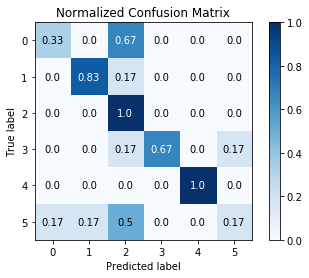

In [44]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(data_sample.emotion, predicted, normalize=True)

In [45]:
print(classification_report(predicted,data_sample.emotion))

             precision    recall  f1-score   support

          0       0.33      0.67      0.44         3
          1       0.83      0.83      0.83         6
          2       1.00      0.40      0.57        15
          3       0.67      1.00      0.80         4
          4       1.00      1.00      1.00         6
          5       0.17      0.50      0.25         2

avg / total       0.83      0.67      0.68        36



### LINEAR KERNEL

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC,LinearSVC

clf = LinearSVC().fit(X_train, y_train)
#print(clf.predict(X_train_counts))
#print(clf.predict_proba(X_train_counts))
print(clf.classes_)
print(clf.coef_)

predicted = clf.predict(X_test)
print predicted
clf.score(X_test, y_test)    


accuracy = accuracy_score(y_test, predicted)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'
print(classification_report(y_test, predicted))

In [ ]:
cm = confusion_matrix(y_test, predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM RBF Kernel Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=5)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
confusion_matrix(predicted,y_test)

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(predicted,y_test, normalize=True)

In [ ]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(clf, 'svm_linear_model.pkl') 
model = joblib.load('svm_linear_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#data_sample.emotion
print predicted

accuracy = accuracy_score(predicted,data_sample.emotion)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(predicted,data_sample.emotion, normalize=True)

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(predicted,data_sample.emotion)
conf

In [ ]:
from sklearn.svm import SVC
best_score = 0
for C in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters, train an SVC
        linearsvm = SVC(kernel='linear', C=C)
        linearsvm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = linearsvm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        print (linearsvm.predict(X_test))
        mean = score
        params = {'C': C}
        print("%0.3f for %r" % (mean, params))
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C}
            
#print(svm.predict(best_score))
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(linearsvm, 'svm_linear_hp_model.pkl') 
model = joblib.load('svm_linear_hp_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#print data_sample.emotion
print predicted

accuracy = accuracy_score(predicted, data_sample.emotion)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

print(classification_report(predicted,data_sample.emotion))

In [ ]:
confusion_matrix(predicted, data_sample.emotion)

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(predicted, data_sample.emotion, normalize=True)

### POLYNOMIAL KERNEL

In [46]:
from sklearn import svm

clf = SVC(kernel='poly').fit(X_train, y_train)
#print(clf.predict(X_train_counts))
#print(clf.predict_proba(X_train_counts))
#print(clf.classes_)
#print(clf.coef_)
#print(clf.intercept_)

predicted = clf.predict(X_test)
print predicted

accuracy = accuracy_score(y_test, predicted)
print 'The resulting accuracy using Polynomial is ', (100 * accuracy), '%\n'

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
The resulting accuracy using Polynomial is  15.7190635452 %



In [51]:
from sklearn.svm import SVC
best_score = 0
for C in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters, train an SVC
        svm = SVC(kernel='poly',degree=3, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        print (svm.predict(X_test))
        mean = score
        params = {'C': C}
        print("%0.3f for %r" % (mean, params))
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C}
            
#print(svm.predict(best_score))
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
0.157 for {'C': 0.01}
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The resulting accuracy using SVC is  16.6666666667 %

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.17      0.29        36
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0

avg / total       1.00      0.17      0.29        36

[[0 0 0 0 0 0]
 [6 6 6 6 6 6]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


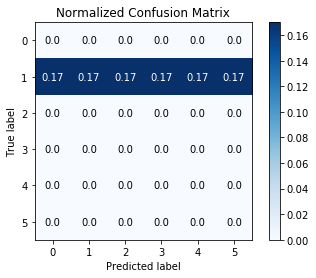

In [53]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(svm, 'svm_linear_hp_model.pkl') 
model = joblib.load('svm_linear_hp_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#print data_sample.emotion
print predicted

accuracy = accuracy_score(predicted, data_sample.emotion)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

print(classification_report(predicted,data_sample.emotion))

print  confusion_matrix(predicted, data_sample.emotion)


import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(predicted, data_sample.emotion, normalize=True)

### SIGMOID KERNEL

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC,LinearSVC

sigmoid = SVC(kernel='sigmoid').fit(X_train, y_train)
#print(clf.predict(X_train_counts))
#print(clf.predict_proba(X_train_counts))
print(clf.classes_)
#print(clf.coef_)
#print(clf.intercept_)

predicted_sigmoid = sigmoid.predict(X_test)
print predicted_sigmoid
clf.score(X_test, y_test)    

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_sigmoid)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

[0 1 2 3 4 5]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
The resulting accuracy using SVC is  15.7190635452 %



In [49]:
from sklearn.svm import SVC
best_score = 0
for C in [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters, train an SVC
        svm = SVC(kernel='sigmoid', C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        print (svm.predict(X_test))
        mean = score
        params = {'C': C}
        print("%0.3f for %r" % (mean, params))
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C}
            
#print(svm.predict(best_score))
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
0.157 for {'C': 0.01}
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

# NEURAL NETWORK

In [18]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time
from sklearn.neural_network import MLPClassifier
import logging

In [26]:
t0 = time()

clf_MLP = MLPClassifier().fit(X_train, y_train)

print("done in %0.3fs" % (time() - t0))

done in 41.872s


In [27]:
print("MLP  PREDICTING   ")
t0 = time()
#MLP
y_pred_MLP = clf_MLP.predict(X_test)
print("done in %0.3fs" % (time() - t0))
print y_pred_MLP
#Print Evaluation (classification report)predicted,data_sample.emotion
print(classification_report(y_pred_MLP, y_test))
accuracy = accuracy_score(y_pred_MLP, y_test)
print 'The resulting accuracy using RBF is ', (100 * accuracy), '%\n'

MLP  PREDICTING   
done in 0.000s
[0 4 0 5 0 3 0 2 0 1 1 0 5 0 0 5 0 1 2 3 0 0 4 5 0 5 3 1 1 2 2 0 5 1 3 2 3
 4 5 3 0 1 0 2 3 5 4 5 4 3 4 0 2 5 5 5 3 4 2 2 1 0 1 0 4 1 3 5 3 5 0 0 5 2
 0 0 4 2 4 5 0 5 3 2 2 3 2 1 2 2 4 4 3 3 1 0 4 4 2 2 0 3 1 3 5 4 2 5 5 3 4
 1 2 5 0 0 1 3 4 0 4 2 1 2 3 1 5 4 3 5 3 5 4 3 4 0 0 3 0 4 1 3 0 4 0 1 2 1
 0 4 4 5 1 1 3 1 1 4 1 1 3 2 5 0 0 1 5 2 0 4 0 2 4 1 0 5 4 3 0 5 1 0 2 0 5
 1 2 3 5 0 1 1 4 3 2 4 5 4 3 4 3 2 2 3 4 5 3 5 3 4 5 1 3 1 5 1 1 1 5 4 5 0
 1 2 3 5 0 3 0 0 1 0 1 5 5 0 1 3 0 5 2 3 2 0 3 1 1 5 3 3 0 4 1 2 5 2 2 5 3
 2 2 0 2 5 4 1 2 3 4 1 5 3 0 5 1 0 1 5 1 1 0 4 0 0 3 3 5 4 0 1 1 1 3 2 4 4
 3 2 5]
             precision    recall  f1-score   support

          0       0.87      0.76      0.81        59
          1       0.94      0.83      0.88        53
          2       0.72      0.72      0.72        43
          3       0.75      0.86      0.80        50
          4       0.70      0.81      0.75        43
          5       0.72      0.71      0

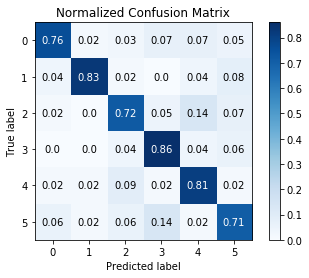

In [28]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_pred_MLP, y_test, normalize=True)

In [29]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(clf_MLP, 'mlp_model.pkl') 
model = joblib.load('mlp_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted_mlp = model.predict(X_new_tfidf)

#print data_sample.emotion
print predicted_mlp

accuracy = accuracy_score(predicted,data_sample.emotion)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

print(classification_report(predicted,data_sample.emotion))

[0 2 0 2 3 3 5 4 3 0 3 2 4 2 2 2 2 0 3 5 1 1 1 1 1 1 0 5 1 2 5 4 4 4 4 4]
The resulting accuracy using SVC is  66.6666666667 %

             precision    recall  f1-score   support

          0       0.33      0.67      0.44         3
          1       0.83      0.83      0.83         6
          2       1.00      0.40      0.57        15
          3       0.67      1.00      0.80         4
          4       1.00      1.00      1.00         6
          5       0.17      0.50      0.25         2

avg / total       0.83      0.67      0.68        36



In [30]:
confusion_matrix(predicted, data_sample.emotion)

array([[2, 0, 0, 0, 0, 1],
       [0, 5, 0, 0, 0, 1],
       [4, 1, 6, 1, 0, 3],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 6, 0],
       [0, 0, 0, 1, 0, 1]])

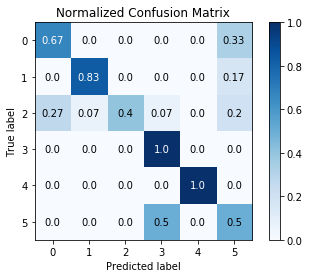

In [31]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(predicted, data_sample.emotion, normalize=True)

In [32]:
t0 = time()
param_grid_MLP = {'alpha': [0.01, 0.03, 0.04, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10],
              'hidden_layer_sizes': [(90,90),(20,20),(30,30)], }
clf_MLP_hp = GridSearchCV(MLPClassifier(), param_grid_MLP)
clf_MLP_hp = clf_MLP_hp.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
#print(clf_MLP.best_estimator_)

C:\Users\KALIT\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\KALIT\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:565: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


done in 1248.100s
Best estimator found by grid search:


In [33]:
print("MLP  PREDICTING   ")
t0 = time()
#MLP
y_pred_MLP = clf_MLP_hp.predict(X_test)
print("done in %0.3fs" % (time() - t0))
print y_pred_MLP
#Print Evaluation (classification report)
print(classification_report(y_test, y_pred_MLP))
accuracy = accuracy_score(y_test, y_pred_MLP)
print 'The resulting accuracy using RBF is ', (100 * accuracy), '%\n'

MLP  PREDICTING   
done in 0.000s
[0 4 0 5 4 3 0 2 0 1 1 0 5 0 0 3 0 1 2 0 0 0 4 5 0 2 2 1 1 2 2 0 5 1 3 2 3
 4 5 3 0 1 0 2 3 5 4 5 4 3 4 3 2 5 5 5 3 4 2 2 1 0 1 0 4 1 3 5 3 5 0 0 5 2
 0 0 4 2 4 5 0 5 3 2 2 3 2 1 2 0 4 4 3 3 1 0 4 4 2 2 0 3 1 3 5 4 2 2 5 3 4
 1 2 5 2 0 1 3 4 0 0 2 1 2 3 1 5 4 3 2 4 5 4 3 4 0 0 3 0 4 1 3 0 4 0 1 2 1
 0 4 4 3 1 1 3 1 1 4 1 1 3 2 5 0 0 1 5 2 0 4 0 2 4 1 0 5 4 3 0 5 5 0 2 0 5
 2 2 3 5 0 1 1 5 3 2 4 5 2 3 4 3 2 2 3 4 5 3 5 3 4 5 1 3 2 5 1 1 1 5 4 5 0
 1 5 3 5 0 3 2 0 1 0 1 5 5 0 1 3 0 5 2 3 2 0 3 1 1 5 3 4 0 4 1 2 5 2 2 5 3
 2 4 0 2 5 4 1 2 3 4 1 5 3 0 5 1 0 1 5 1 1 0 4 0 0 3 3 5 4 0 1 1 1 3 2 4 4
 3 2 5]
             precision    recall  f1-score   support

          0       0.78      0.87      0.82        52
          1       0.88      0.94      0.91        47
          2       0.65      0.74      0.70        43
          3       0.90      0.77      0.83        57
          4       0.89      0.78      0.83        50
          5       0.73      0.72      0

In [34]:
from sklearn.externals import joblib
data_samples = data_sample.text.values.tolist()
#data_samples

joblib.dump(clf_MLP_hp, 'mlp_hp_model.pkl') 
model = joblib.load('mlp_hp_model.pkl')

docs_new = data_samples

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = model.predict(X_new_tfidf)

#print data_sample.emotion
#print predicted

accuracy = accuracy_score(predicted, data_sample.emotion)
print 'The resulting accuracy using SVC is ', (100 * accuracy), '%\n'

print(classification_report(predicted, data_sample.emotion))

The resulting accuracy using SVC is  66.6666666667 %

             precision    recall  f1-score   support

          0       0.33      0.40      0.36         5
          1       1.00      0.75      0.86         8
          2       0.83      0.56      0.67         9
          3       0.67      0.80      0.73         5
          4       0.83      0.83      0.83         6
          5       0.33      0.67      0.44         3

avg / total       0.74      0.67      0.68        36



In [35]:
confusion_matrix(predicted, data_sample.emotion)

array([[2, 0, 1, 0, 0, 2],
       [0, 6, 0, 0, 1, 1],
       [2, 0, 5, 1, 0, 1],
       [1, 0, 0, 4, 0, 0],
       [1, 0, 0, 0, 5, 0],
       [0, 0, 0, 1, 0, 2]])

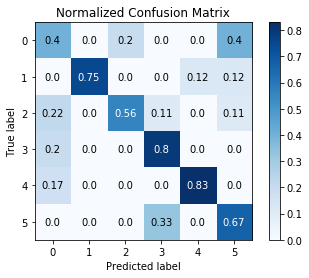

In [36]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(predicted, data_sample.emotion, normalize=True)

# EVALUATION

In [ ]:
#docs_new = ["aku terkejut"]
#X_new_counts = count_vect.transform(docs_new)
#X_new_tfidf = tfidf_transformer.transform(X_new_counts)

#predict = clf.predict(X_new_tfidf)
#predict

# PLOT

# COBA COBA

In [ ]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_train_tfidf, y_emotion, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_validasi_tfidf, y_emotion_validasi, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
    for C in [0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 0.6, 1, 3, 6, 9, 10]:
        # for each combination of parameters train an SVC
        svm = SVC(kernel='rbf', gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

In [ ]:
#from sklearn.externals import joblib
#joblib.dump(clf, 'model.pkl') 

In [ ]:
#model = joblib.load('model.pkl')
#docs_new = data_test.text
#X_new_counts = count_vect.transform(docs_new)
#X_new_tfidf = tfidf_transformer.transform(X_new_counts)

#predicted = model.predict(X_new_tfidf)
#predicted